In [ ]:
pip install tensorflow numpy matplotlib

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,961 (66.25 KB)

 Trainable params: 16,961 (66.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 1.5981e-04 - val_loss: 1.1858e-05
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 1.4476e-05 - val_loss: 4.7157e-06
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.1941e-06 - val_loss: 3.5845e-07
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 2.9314e-07 - val_loss: 1.1674e-07
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 5.1083e-08 - val_loss: 1.6381e-08
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 8.5630e-09 - val_loss: 1.7867e-09
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 7.5106e-10 - val_loss: 1.6243e-10
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 8.4971e-11 - val_loss: 1.9190e-11
Epoch 9/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 7.9876e-12 - val_loss: 2.6956e-13
Epoch 10/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 9.4443e-13 - val_loss: 4.6136e-14
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


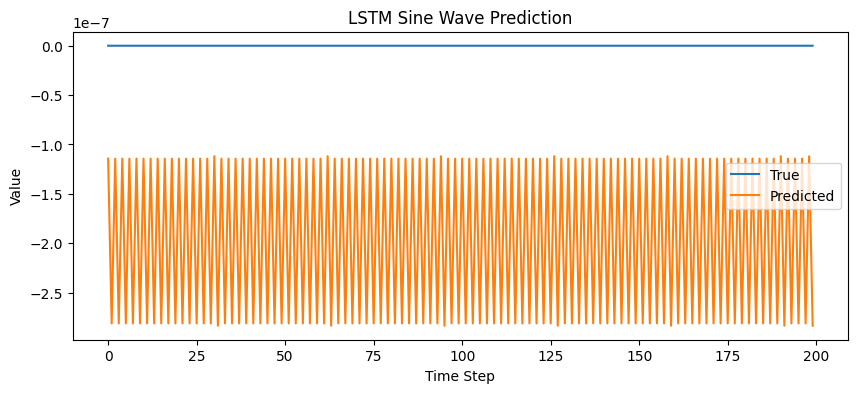

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Generate sine wave data
def generate_sine_wave(seq_length, total_series):
    # Generate a slightly longer sequence to get the target values
    x = np.linspace(0, total_series * np.pi, seq_length * total_series + 1)
    y = np.sin(x)

    # Create input sequences (X) and corresponding target values (y)
    X = []
    targets = []
    for i in range(total_series):
        # Each sequence in X contains seq_length data points
        X.append(y[i * seq_length : (i + 1) * seq_length])
        # The target for each sequence is the data point immediately following the sequence
        targets.append(y[(i + 1) * seq_length])

    # Reshape X to (total_series, seq_length, 1) for LSTM input
    X = np.array(X).reshape((total_series, seq_length, 1))
    # Reshape targets to (total_series, 1) for the dense layer output
    targets = np.array(targets).reshape((total_series, 1))

    return X, targets

# Parameters
SEQ_LENGTH = 50
TOTAL_SERIES = 1000

# Create dataset
X, y = generate_sine_wave(SEQ_LENGTH, TOTAL_SERIES)

# Split into training and test sets
train_size = int(0.8 * TOTAL_SERIES)
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

# Build LSTM model
model = Sequential([
    LSTM(64, input_shape=(SEQ_LENGTH, 1)),
    Dense(1) # Output layer for a single prediction
])
model.compile(optimizer='adam', loss='mse')
model.summary()

# Train model
# The target shape for y_train should be (total_series, 1), not (total_series, seq_length, 1)
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Predict
predictions = model.predict(X_test)

# Plot
plt.figure(figsize=(10, 4))
# Plotting y_test (which is now the next value) against predictions
plt.plot(y_test[:, 0], label="True")
plt.plot(predictions[:, 0], label="Predicted")
plt.legend()
plt.title("LSTM Sine Wave Prediction")
plt.xlabel("Time Step")
plt.ylabel("Value")
plt.show()